___
# Exercício: <p> <center> Modelos probabilísticos contínuos
___

## Aula 13

**Objetivo da aula:** Ao final desta aula, o aluno deve ser capaz de descrever e aplicar as distribuições de probabilidades adequadas para variáveis aleatórias contínuas considerando modelos probabilísticos contínuos já bem definidos na literatura estatística.


___
<div id="indice"></div>

## Índice

  - [Exercício 1](#ex1)
  - [Exercício 2](#ex2)
  - [Exercício 3](#ex3)
  - [Exercício 4](#ex4)
  - [Exercício 5](#ex5) **- APS7 disponível no Blackboard**
___

In [65]:
from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
import numpy as np
import matplotlib.pyplot as plt

<div id="ex1"></div>

### EXERCÍCIO 1

Para X ~ N(90, 100), calcular:

a) $P(X \leq 115)$

b) $P(X \geq 80 | X < 100)$

c) O número $c$ tal que $P(X < c) = 0,975$

d) O número $d$ tal que $P(X > d) = 0,95$

e) O valor de $e$ tal que $P(90 - e \leq X \leq 90 + e) = 0,99$

*Respostas esperadas: (a)0.9937903346742238  (b)0.8114265826549397  (c)109.59963984540053 (d)73.55146373048528 (e)25.758293035489004*


In [66]:
media = 90
var = 100
dp = var ** 0.5

In [67]:
# item a)
stats.norm.cdf(115, media, dp)

0.9937903346742238

In [68]:
# item b)
1 - stats.norm.cdf(80, media, dp) / stats.norm.cdf(100, media, dp)

0.8114265826549397

In [69]:
# item c)
stats.norm.ppf(0.975, media, dp)

109.59963984540053

In [70]:
# item d)
stats.norm.ppf(1 - 0.95, media, dp)

73.55146373048528

In [71]:
# item e)
stats.norm.interval(0.99, media, dp)[1] - 90

25.758293035489004

[Voltar ao Índice](#indice)

<div id="ex2"></div>

### EXERCÍCIO 2

As notas no quiz final de Ciência dos Dados distribuem-se segundo uma variável aleatória normal com média 6,5 e desvio padrão 1,6. O professor deseja dividir a classe em 3 categorias, da seguinte forma: os 30% que tiveram as maiores notas serão aprovados, os 50% com notas intermediárias ficarão de exame e os 20% que tiveram as menores notas serão reprovados. 

a) Quais os limites de nota entre cada uma das categorias?

b) Caso a nota para aprovação (sem ir para exame) fosse igual a 7,0 e uma turma tivesse 50 alunos, quantos desses seriam aprovados sem ir para o exame? 

*Respostas esperadas: (a)5.153406026283337 e 7.339040820332865    (b)19*

In [72]:
media_quiz = 6.5
dp_quiz = 1.6

print(stats.norm.ppf(0.2, loc=media_quiz, scale=dp_quiz))
print(stats.norm.ppf(0.7, loc=media_quiz, scale=dp_quiz))

5.153406026283337
7.339040820332865


In [73]:
(1-stats.norm.cdf(7, loc=media_quiz, scale=dp_quiz)) * 50

18.866514076492148

[Voltar ao Índice](#indice)

<div id="ex3"></div>

### EXERCÍCIO 3

Um determinado calçado é vendido em lojas populares e em lojas sofisticadas. De todas as lojas, 70%  são populares e 30%  são sofisticadas. Nas lojas populares seu preço segue uma distribuição normal com média 80 e desvio-padrão 12. Já em lojas sofisticadas, o preço também segue uma distribuição normal de média 160 e desvio-padrão 30. 

a) Determine maior preço considerando os 25% menores valores na distribuição de preços de uma loja popular.

b) Gastou-se mais de $100,00 para comprar o calçado. Qual é a probabilidade da compra ter sido feita numa loja popular?

*Respostas esperadas: (a)71.90612299764702    (b)0.10241995600307374*

In [74]:
media_popular = 80
dp_popular = 12
media_sofisticada = 160
dp_sofisticada = 30

In [75]:
stats.norm.ppf(0.25, loc=media_popular, scale=dp_popular)

71.90612299764702

In [76]:
# P(Popular | X > 100)

((1 - stats.norm.cdf(100, loc=media_popular, scale=dp_popular)) * 0.7) / ((1 - stats.norm.cdf(100, loc=media_popular, scale=dp_popular)) * 0.7 + (1 - stats.norm.cdf(100, loc=media_sofisticada, scale=dp_sofisticada)) * 0.3) 

0.10241995600307374

[Voltar ao Índice](#indice)

<div id="ex4"></div>

### EXERCÍCIO 4

Em um processo industrial, o diâmetro de um rolamento é uma parte importante do processo.

Sabe-se que a probabilidade de um rolamento ter diâmetro maior do 2,98 cm é de 80%. 

Sabe-se, também que a probabilidade de que um rolamento tenha diâmetro abaixo de 2,97 cm é de 10%. 

a) Admitindo que o diâmetro de um rolamento segue uma distribuição normal, determine a média e o desvio-padrão dos diâmetros dos rolamentos que saem da linha de produção.

b) Determine a especificação que represente a maior distância da média, para mais ou para menos, contendo 95% dos rolamentos produzidos. 

*Respostas esperadas: (a) mu=2.9991307844085426 sigma=0.022730871852326348   (b)0.04455169016775473*

In [77]:
z1 = stats.norm.ppf(0.2)
z2 = stats.norm.ppf(0.1)
(1 - (z1*z2))

-0.07858100948094604

In [78]:
# z1 = (2.98 - media) / dp
# z2 = (2.97 - media) / dp

# z1 = (2.98 - media) / z2 * (2.97 - media)
# z1 * (z2 * (2.97 - media)) = (2.98 - media)
# z1 * (2.97*z2 - z2*media) = 2.98 - media
# 2.97*z2*z1 - z1*z2*media = 2.98 - media
media = (2.98 - (2.97*z1*z2)) / (1 - (z1*z2))
media

2.842742790324873

[Voltar ao Índice](#indice)

___
<div id="ex5"></div>

### EXERCÍCIO 5 - Modelagem do Tempo para resolver uma prova de MatVar

Um grupo de alunos de cada uma das três turmas que cursam Ciência dos Dados estava discutindo com intuito de modelar o tempo, em horas, que um aluno irá levar para fazer uma prova de Matemática da Variação. 

Após cada grupo de alunos chegar a um consenso, foi escolhido um modelo probabilístico contínuo diferente para cada turma A, B e C. Dessa forma, os três modelos foram escolhidos com intuito de descrever o comportamento da variável X: tempo, em horas, que um aluno irá levar para entregar uma prova de Matemática da Variação. Lembrando que um aluno tem até duas horas para fazê-la.

Esses três modelos são dados por:

> * **Turma A:** $X_A$ segue o seguinte modelo:
    $ f(x) = \left\{ \begin{array}{ll}\\
                +0.4-0.8x & \rm{se }\hspace{2mm} 0<x<0.5 \\
                -0.4+0.8x & \rm{se }\hspace{2mm} 0.5\leq x\leq2 \\
                0 & \rm{caso}\hspace{2mm}\rm{contrário} 
             \end{array} \right.$

> * **Turma B:** $X_B\sim Normal(1; 0.3^2)$, ou seja, $\mu=1$ e $\sigma=0.3$.

> * **Turma C:** $X_C\sim Uniforme(0; 2)$, ou seja, $a=0$ e $b=2$.




Admitindo que os alunos façam suas provas de forma independente uns dos outros, responda:
	
a) Estudando o comportamento da função densidade de probabilidade de cada modelo probabilístico, qual você entende ser o mais adequado para descrever o comportamento da variável X? E qual você entende ser o menos adequado? Justifique suas respostas após estudar o comportamento das fdp’s escolhidas por cada turma. *Nota: a fdp da turma A tem que ser construída usando a f(x) dada e, as demais, usando a função `pdf` do `scipy.stats`.

b) Qual a probabilidade de um aluno da turma B demorar mais do que 1 hora e meia para entregar a prova de Matemática da Variação? E na da turma C? 

c)	Atualmente, 34% dos alunos estão na turma A, 34% na B e 32% na C. Qual a probabilidade de um aluno qualquer (ou seja, um aluno de qualquer uma dessas três turmas) demorar mais do que uma hora e meia para entregar a prova final dessa disciplina?

d) Qual o menor tempo de entrega da prova dentre os últimos 20% de alunos que entregam na sala da turma B? E na da turma C? Interprete os resultados.


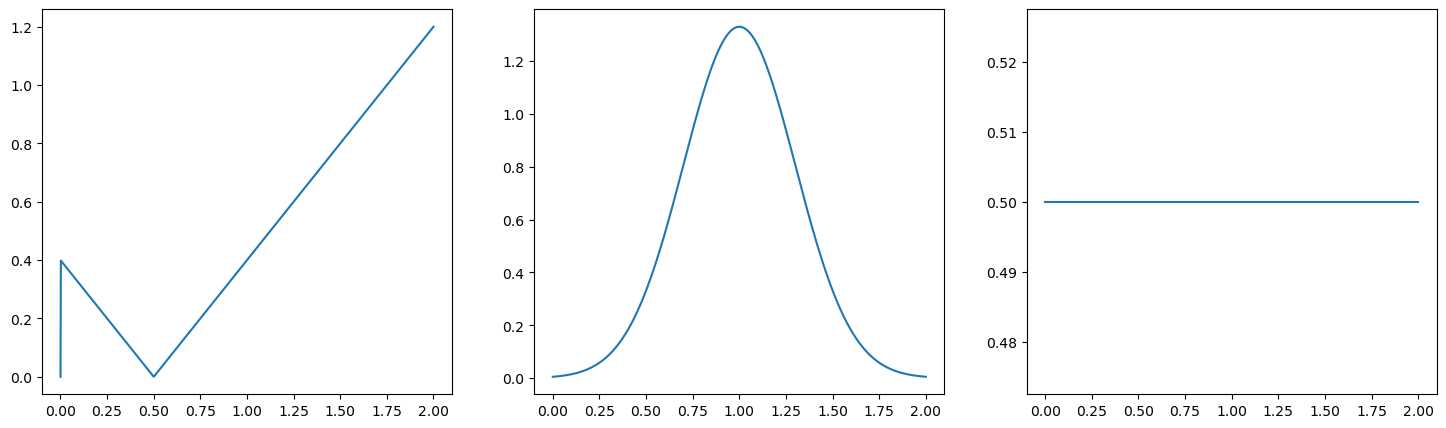

In [84]:
def turmaA(x):
    if 0 < x < 0.5:
        return 0.4 - 0.8 * x
    elif 0.5 <= x <= 2:
        return -0.4 + 0.8 * x
    return 0

x = np.linspace(0, 2, 1000)
fa = [turmaA(val) for val in x]
fb = stats.norm.pdf(x, loc=1, scale=0.3)
fc = stats.uniform.pdf(x, loc=0, scale=2)

plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot(x, fa)
plt.subplot(132)
plt.plot(x, fb)
plt.subplot(133)
plt.plot(x, fc)
plt.show()

In [85]:
print(1 - stats.norm.cdf(1.5, loc=1, scale=0.3))
print(1 - stats.uniform.cdf(1.5, loc=0, scale=2))

0.047790352272814696
0.25


In [88]:
0.5000 * 0.34 + 0.048 * 0.34 + 0.2500 * 0.32

0.26632

In [92]:
print(stats.norm.ppf(0.8, loc=1, scale=0.3))
print(stats.uniform.ppf(0.8, loc=0, scale=2))

1.2524863700718742
1.6


[Voltar ao Índice](#indice)